# Tensorboard로 시각화한 틴더의 relationship 성공 여부 예측 

<span style="color: blue; font-size: 18pt">
1. 라이브러리 임포트하기
</span>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager   
import numpy as np
import tensorflow as tf

In [2]:
import tensorboard

tensorboard.__version__

'2.10.0'

<span style="color: blue; font-size: 18pt">
2. 데이터셋 가져오기
</span>

In [3]:
df_train = pd.read_csv("C:/Users/user/Downloads/final/5_Refined Dataset_(1).csv")


- 이번 딥러닝 프로젝트에 사용하는 데이터셋은 <span style="color: red">"5_Refined Dataset_(1)"</span> <span style="color: red">"5_Refined Dataset_(2)"</span>로 이루어져 있습니다. 

- 모델을 학습시킬 때는 <span style="color: red">"5_Refined Dataset_(1)"</span>에서 7:3을 나눠 학습 후 정확도를 측정합니다.

- y값이 존재하지 않는 <span style="color: red">"5_Refined Dataset_(2)"</span> 데이터셋은 마지막에 완성된 모델을 통한 예측 시에 사용합니다.


In [4]:
df_train

,ID,Answer,Count,Percentage,It became a relationship,Segment type_gender,Segment type_mobile,Segment type_university,Segment type_web,"Segment Description_Meridian, Idaho",Segment Description_SegDiscrip_Others
0,292890.8970,0,0.000000,0.000000,0,0.0,0.0,0.0,1.0,1.0,0.0
1,292887.9870,0,0.000000,0.000000,0,0.0,0.0,0.0,1.0,1.0,0.0
2,292894.0656,0,499.173606,0.225255,0,1.0,0.0,0.0,0.0,1.0,0.0
3,292887.1180,0,0.000000,0.000000,0,0.0,0.0,0.0,1.0,1.0,0.0
4,292893.6561,0,455.925963,0.211360,0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1891,292887.5496,0,0.000000,0.000000,0,0.0,0.0,0.0,1.0,1.0,0.0
1892,292881.6932,0,1203.190399,0.312360,0,0.0,1.0,0.0,0.0,1.0,0.0
1893,292900.8499,0,806.378820,0.488025,0,1.0,0.0,0.0,0.0,1.0,0.0
1894,292893.8600,0,1149.529381,0.488984,0,1.0,0.0,0.0,0.0,1.0,0.0


In [5]:
# 랜덤 시드 생성
seed = 3
np.random.seed(3)
tf.random.set_seed(3)

In [6]:
dataset = df_train.values
X = dataset[:, [0, 1, 2, 3, 5, 6, 7, 8, 9, 10]]
Y = dataset[:, 4]

In [7]:
X

array([[2.92890897e+05, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.92887987e+05, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.92894066e+05, 0.00000000e+00, 4.99173606e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [2.92900850e+05, 0.00000000e+00, 8.06378820e+02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.92893860e+05, 0.00000000e+00, 1.14952938e+03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.92890294e+05, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [8]:
Y

array([0., 0., 0., ..., 0., 0., 0.])

<span style="color: blue; font-size: 18pt">
3. 데이터셋을 train set과 test set으로 분리
</span>

In [9]:
from sklearn.model_selection import train_test_split 

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

In [11]:
print("전체 데이터 개수 : ", len(X))
print("전체 트레이닝 데이터 개수 : ", len(X_train))
print("전체 테스트 데이터 개수 : ", len(X_test)) 

전체 데이터 개수 :  1896
전체 트레이닝 데이터 개수 :  1327
전체 테스트 데이터 개수 :  569


<span style="color: blue; font-size: 18pt">
4. 딥러닝 모델링
</span>

- Keras Rensorboard 결과를 기록할 로그 디렉토리 생성

In [12]:
from datetime import datetime

In [13]:
logdir="logs\\" + datetime.now().strftime("%Y%m%d-%H%M%S") # 현재 날짜 및 시각으로 디렉토리 이름으로 로그 디렉토리 생성 

In [14]:
logdir

'logs\\20231217-215823'

- Keras Tensorboard 콜백 정의

In [15]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

In [16]:
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Dense(16, input_dim=10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])    

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [18]:
hist_2 = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), 
                   epochs=100, callbacks=[tensorboard_callback])

Epoch 1/100
42/42 [==============================] - 1s 8ms/step - loss: 42617.7773 - accuracy: 0.3497 - val_loss: 24287.5586 - val_accuracy: 0.3533
Epoch 2/100
42/42 [==============================] - 0s 2ms/step - loss: 8992.3154 - accuracy: 0.4356 - val_loss: 1988.3906 - val_accuracy: 0.6467
Epoch 3/100
42/42 [==============================] - 0s 3ms/step - loss: 561.5314 - accuracy: 0.5697 - val_loss: 88.9498 - val_accuracy: 0.3937
Epoch 4/100
42/42 [==============================] - 0s 3ms/step - loss: 56.7330 - accuracy: 0.4943 - val_loss: 21.8208 - val_accuracy: 0.4077
Epoch 5/100
42/42 [==============================] - 0s 3ms/step - loss: 39.2183 - accuracy: 0.5102 - val_loss: 43.7448 - val_accuracy: 0.3620
Epoch 6/100
42/42 [==============================] - 0s 3ms/step - loss: 48.8598 - accuracy: 0.5501 - val_loss: 41.6893 - val_accuracy: 0.6467
Epoch 7/100
42/42 [==============================] - 0s 3ms/step - loss: 75.2696 - accuracy: 0.5230 - val_loss: 60.8218 - val_accur

Epoch 58/100
42/42 [==============================] - 0s 4ms/step - loss: 60.9565 - accuracy: 0.5667 - val_loss: 104.9783 - val_accuracy: 0.6467
Epoch 59/100
42/42 [==============================] - 0s 4ms/step - loss: 41.3096 - accuracy: 0.5599 - val_loss: 12.3723 - val_accuracy: 0.5888
Epoch 60/100
42/42 [==============================] - 0s 4ms/step - loss: 30.0167 - accuracy: 0.5878 - val_loss: 90.1373 - val_accuracy: 0.3533
Epoch 61/100
42/42 [==============================] - 0s 4ms/step - loss: 31.6657 - accuracy: 0.5720 - val_loss: 9.2554 - val_accuracy: 0.6116
Epoch 62/100
42/42 [==============================] - 0s 4ms/step - loss: 107.6318 - accuracy: 0.5561 - val_loss: 181.9914 - val_accuracy: 0.3533
Epoch 63/100
42/42 [==============================] - 0s 4ms/step - loss: 54.3073 - accuracy: 0.5448 - val_loss: 118.8077 - val_accuracy: 0.6467
Epoch 64/100
42/42 [==============================] - 0s 4ms/step - loss: 79.9709 - accuracy: 0.5245 - val_loss: 228.0561 - val_accur

<span style="color: magenta; font-size: 11pt">
cmd창에서 tensorborad 확인 후 모델 성능 확인
</span>

In [19]:
import os
os.getcwd()

'C:\\Users\\user\\Downloads\\final'

In [20]:
logdir

'logs\\20231217-215823'

<span style="color: blue; font-size: 18pt">
5. 딥러닝 평가 
</span>

In [21]:
# 모델 평가
loss, acc = model.evaluate(x=X_test, y=Y_test, verbose=0) 
print("Evaluate with test dataset : Loss = {:.4f}".format(loss))      
print("Evaluate with test dataset : Accuracy = {:.4f}".format(acc))  

Evaluate with test dataset : Loss = 9.8263
Evaluate with test dataset : Accuracy = 0.6608


<span style="color: magenta; font-size: 11pt">
loss, accuracy 시각화 
</span>

In [23]:
font_path = "C:\\Windows\\Fonts\\HMFMMUEX.TTC"
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()

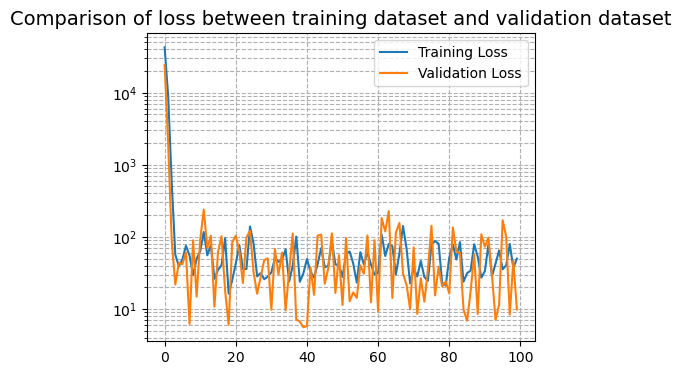

In [24]:
plt.figure(figsize=(5,4))
plt.title('Comparison of loss between training dataset and validation dataset', fontsize=14)

# 로그 스케일 적용
plt.yscale('log')

plt.plot(hist_2.history['loss'], label='Training Loss')      # 트레이닝 데이터셋의 loss
plt.plot(hist_2.history['val_loss'], label='Validation Loss')  # 테스트(검증) 데이터셋의 loss

plt.legend(['Training Loss', 'Validation Loss']) # 범례
plt.grid(True, which="both", linestyle='--') # 그리드 적용, 'both'는 메이저와 마이너 그리드 모두 적용
plt.show()


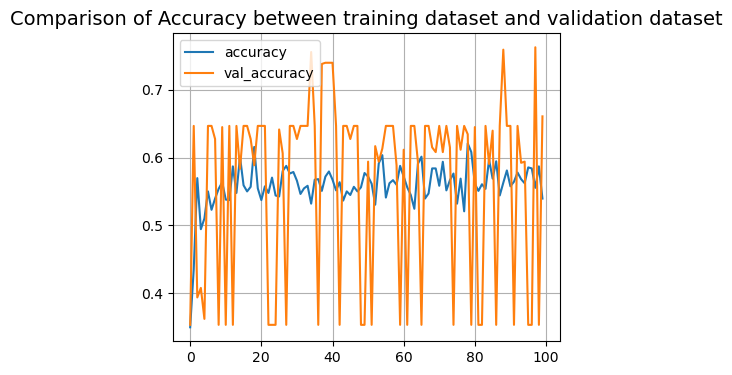

In [25]:
plt.figure(figsize=(5,4))
plt.title('Comparison of Accuracy between training dataset and validation dataset', fontsize=14)
plt.plot(hist_2.history['accuracy'])      # 트레이닝 데이터셋의 정확도
plt.plot(hist_2.history['val_accuracy'])  # 테스트 데이터셋의 정확도
plt.legend(['accuracy','val_accuracy']) # 범례
plt.grid()
plt.show()

<span style="color: blue; font-size: 18pt">
7. 새로운 데이터를 대상으로 딥러닝 모델을 사용하여 예측하기 
</span>

In [26]:
# keras의 Sequential()에서 제공하는 predict() 기능 사용

test_data = pd.read_csv('C:/Users/user/Downloads/final/5_Refined Dataset_(2).csv', delimiter=",", skiprows=1)

# 데이터를 NumPy 배열로 변환 
test_array = test_data.values

In [27]:
# 모델 예측 및 정확도 측정
test_predictions = model.predict(test_array)

20/20 [==============================] - 0s 1ms/step


In [28]:
# 예측 결과를 이진 레이블로 변환
test_pred_labels = [1 if p > 0.5 else 0 for p in test_predictions]

In [29]:
# 예측 결과 출력
for i, prediction in enumerate(test_pred_labels):
    print(f"Data {i+1} relationship 성공 여부 예측: {prediction}")

Data 1 relationship 성공 여부 예측: 0
Data 2 relationship 성공 여부 예측: 0
Data 3 relationship 성공 여부 예측: 1
Data 4 relationship 성공 여부 예측: 1
Data 5 relationship 성공 여부 예측: 0
Data 6 relationship 성공 여부 예측: 0
Data 7 relationship 성공 여부 예측: 0
Data 8 relationship 성공 여부 예측: 0
Data 9 relationship 성공 여부 예측: 0
Data 10 relationship 성공 여부 예측: 0
Data 11 relationship 성공 여부 예측: 0
Data 12 relationship 성공 여부 예측: 0
Data 13 relationship 성공 여부 예측: 1
Data 14 relationship 성공 여부 예측: 0
Data 15 relationship 성공 여부 예측: 1
Data 16 relationship 성공 여부 예측: 0
Data 17 relationship 성공 여부 예측: 0
Data 18 relationship 성공 여부 예측: 1
Data 19 relationship 성공 여부 예측: 0
Data 20 relationship 성공 여부 예측: 1
Data 21 relationship 성공 여부 예측: 0
Data 22 relationship 성공 여부 예측: 0
Data 23 relationship 성공 여부 예측: 0
Data 24 relationship 성공 여부 예측: 0
Data 25 relationship 성공 여부 예측: 0
Data 26 relationship 성공 여부 예측: 0
Data 27 relationship 성공 여부 예측: 0
Data 28 relationship 성공 여부 예측: 0
Data 29 relationship 성공 여부 예측: 1
Data 30 relationship 성공 여부 예측: 0
Data 31 relationshi

<span style="color: blue; font-size: 18pt">
8. 딥러닝 모델 저장하기
</span>

In [30]:
model.save('C:/Users/user/Downloads/final/DL_RESULT/tinder_Sequential_tensorboard.h5') 